In [ ]:
from google.colab import files
uploaded = files.upload()


Saving RELIANCE.BO.csv to RELIANCE.BO.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('RELIANCE.BO.csv')


In [ ]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-02,490.700012,496.250000,488.524994,493.149994,482.155212,451034.0
1,2016-05-03,494.899994,497.350006,486.299988,488.024994,477.144531,564272.0
2,2016-05-04,488.000000,491.825012,487.125000,488.750000,477.853333,454560.0
3,2016-05-05,491.125000,491.750000,485.549988,487.524994,476.655609,506244.0
4,2016-05-06,487.500000,488.475006,483.750000,484.575012,473.771423,451776.0


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1103,2020-10-19,2192.000000,2228.399902,2156.000000,2175.800049,2175.800049,352226.0
1104,2020-10-20,2183.699951,2193.699951,2152.199951,2155.500000,2155.500000,364138.0
1105,2020-10-21,2171.100098,2191.000000,2098.750000,2123.250000,2123.250000,534557.0
1106,2020-10-22,2123.000000,2133.050049,2091.500000,2107.100098,2107.100098,301966.0
1107,2020-10-23,2109.000000,2134.800049,2095.649902,2112.550049,2112.550049,618540.0


In [ ]:
#We have data from 5 Feb 2016 to 26 June 2020
data_close = data.reset_index()['Close']        # Taking the close column of the dataset
data_close = data_close.replace(to_replace = np.nan, value = data_close.mean())    # Replacing nan values with mean of the column


In [ ]:
data_close.isnull().values.any()        # Checking for NaN values

False

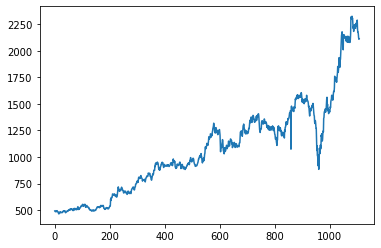

In [ ]:
plt.plot(data_close)

In [ ]:
#LSTM are sensitive to Scale of data, we scale down values to interval (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [ ]:
data_close

array([[0.01514377],
       [0.01238669],
       [0.01277672],
       ...,
       [0.89208377],
       [0.88339565],
       [0.88632755]])

In [ ]:
# Splitting data in Test Train set
training_size = int(len(data_close) * 0.65)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0 : training_size, :],data_close[training_size : len(data_close), : 1]

In [ ]:
def  create_dataset(dataset, time_step):
  data_X, data_Y = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i : (i + time_step), 0]
    data_X.append(a)
    data_Y.append(dataset[i + time_step, 0 ])
  return np.array(data_X), np.array(data_Y)


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
np.isnan(np.min(X_test))

False

In [ ]:
np.isnan(np.min(X_test))

False

In [ ]:
# Reshaping the data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
y_test[94] = 0.756400
y_test

array([0.43580705, 0.42932459, 0.41810792, 0.42141643, 0.39857976,
       0.39623962, 0.39449122, 0.40751   , 0.4072948 , 0.4137504 ,
       0.40097369, 0.40915082, 0.40121581, 0.39389941, 0.39847213,
       0.38394702, 0.42467116, 0.41619818, 0.43766307, 0.43833553,
       0.44737334, 0.45390965, 0.46674015, 0.4519192 , 0.45512008,
       0.45321027, 0.45447454, 0.46305509, 0.48277159, 0.47739192,
       0.48021625, 0.48325578, 0.48831261, 0.50092798, 0.51123006,
       0.51066517, 0.49915266, 0.52250044, 0.5195147 , 0.32763362,
       0.53909671, 0.54533712, 0.53753659, 0.53366326, 0.53379775,
       0.52860636, 0.52026787, 0.53463163, 0.52739593, 0.51795465,
       0.54173276, 0.53710626, 0.54028028, 0.53447021, 0.56206794,
       0.58210721, 0.57683511, 0.58175752, 0.58945041, 0.58845518,
       0.59431904, 0.59980627, 0.58417837, 0.60322242, 0.59921452,
       0.58506603, 0.58385561, 0.5863571 , 0.59582537, 0.59025736,
       0.59047256, 0.59310861, 0.60115119, 0.59259757, 0.59023

In [ ]:
X_test.shape

(287, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test) , epochs = 100, batch_size =  64, verbose = 1 )

Epoch 1/100
10/10 [==============================] - 1s 121ms/step - loss: 0.0274 - val_loss: 0.0099
Epoch 2/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0055 - val_loss: 0.0326
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0175
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 7.9754e-04 - val_loss: 0.0062
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 6.2608e-04 - val_loss: 0.0067
Epoch 7/100
10/10 [==============================] - 0s 19ms/step - loss: 5.9823e-04 - val_loss: 0.0072
Epoch 8/100
10/10 [==============================] - 0s 19ms/step - loss: 5.9279e-04 - val_loss: 0.0060
Epoch 9/100
10/10 [==============================] - 0s 19ms/step - loss: 5.8359e-04 - val_loss: 0.0072
Epoch 10/100
10/10 [==============================] - 0s 18ms/step - loss: 6.10

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

905.4255783956261

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

1587.4132566239832

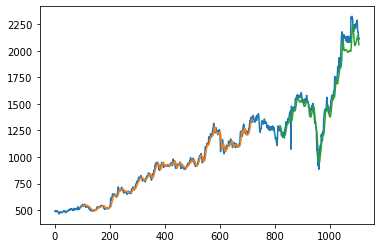

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [ ]:
len(test_data)

388

In [ ]:
x_input = test_data[288:].reshape(1,-1)
x_input.shape
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8249811]
101
1 day input [0.59448045 0.5767544  0.59552946 0.5769696  0.60456733 0.61866204
 0.62000696 0.61887724 0.64085318 0.69639827 0.68978125 0.6751755
 0.67910262 0.67404572 0.68730662 0.67684319 0.66619141 0.6847782
 0.69696317 0.71146135 0.74583745 0.73107022 0.71676031 0.73141991
 0.76041635 0.79043493 0.7809398  0.74271722 0.7413723  0.77808855
 0.78236543 0.81063555 0.82798499 0.85840698 0.90443008 0.90962154
 0.92124155 0.87734353 0.8842294  0.8617962  0.83032513 0.90709299
 0.8939128  0.89816282 0.90469907 0.89012024 0.89789384 0.89442398
 0.89157273 0.88716142 0.87497639 0.88966292 0.89743651 0.87761251
 0.86975814 0.87745109 0.86989263 0.89940017 0.88587022 0.88796837
 0.86803667 0.87287837 0.89496194 0.88611228 0.86741793 0.87010776
 0.88336873 0.91252651 0.9950506  0.99731017 0.98843371 0.99679899
 1.         0.98681981 0.99012825 0.96304156 0.93937101 0.94926969
 0.923232   0.93428725 0.94184572 0.95750061 0.95152912 0.94684883
 0.93937101 0.93883305 0.9641175  0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(data_close)

1108

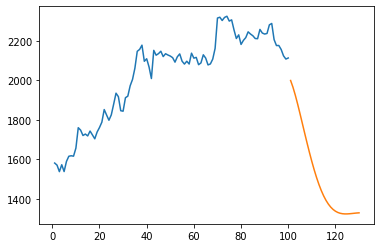

In [ ]:
plt.plot(day_new,scaler.inverse_transform(data_close[1008:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

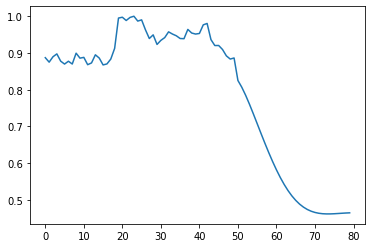

In [ ]:
df3=data_close.tolist()
df3.extend(lst_output)
plt.plot(df3[1058:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

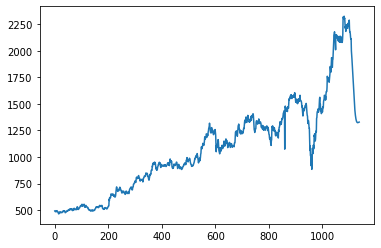

In [ ]:
plt.plot(df3)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving RELIANCE.BO_pred.csv to RELIANCE.BO_pred.csv


In [ ]:
data_true= pd.read_csv('RELIANCE.BO_pred.csv')

In [ ]:
#We have data from 5 Feb 2016 to 26 July 2020
data_close_true = data_true.reset_index()['Close']        # Taking the close column of the dataset
data_close_true = data_close_true.replace(to_replace = np.nan, value = data_close_true.mean())    # Replacing nan values with mean of the column

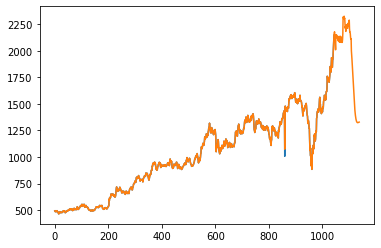

In [ ]:
plt.plot(df3)

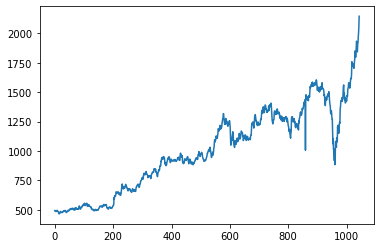

In [ ]:
plt.plot(data_close_true)

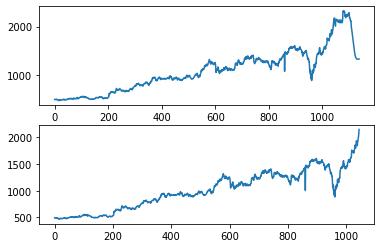

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot(df3,label = 'Predicted')
plt.subplot(212)
plt.plot(data_close_true, label = 'Actual')
plt.show()

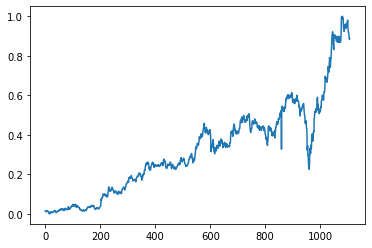

In [ ]:
plt.plot(data_close)